In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../Y3 - Sample data/Z2 - datasetprepclean.csv', index_col = 0,
                     )
print('dataset shape:', dataset.shape)
dataset.head()

dataset shape: (5401, 435)


,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,thick_12.0,thick_15.0,thick_20.0,VAMAT,VALAJOUT,VALTOT,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN,bend_group
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,0,0,0,12.51,5.15,17.66,0.000010,0.000007,0.000011,3-5
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0,0,0,0.25,0.92,1.17,0.000007,0.000007,0.000007,0
L1600600,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,522587.812500,3.0,...,0,0,0,18.36,7.55,25.91,0.000012,0.000012,0.000012,1-2
L1600610,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,439818.781250,3.0,...,0,0,0,9.18,4.77,13.95,0.000007,0.000007,0.000007,1-2
L1600620,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,394797.968750,3.0,...,0,0,0,9.18,4.65,13.83,0.000008,0.000008,0.000008,1-2


In [3]:
#possible Outliers
outlierdf = pd.read_csv('../Y3 - Sample data/Z3 - outliers.csv', header=None)
outlierdf.columns = ['thickness', 'COART', 'MSE']
outlierdf.head()

,thickness,COART,MSE
0,2.0,L5605491,577.278887
1,2.0,L5606410,59.598463
2,2.0,L6003250,36.840642
3,2.0,L5606461,12.113153
4,2.0,L3132270,6.624944


In [4]:
dataset.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'radius_approx', 'radius_count', 'direction_count',
       'bend_count', 'benddxf_bend_radius_00', 'benddxf_bend_angle_00',
       'benddxf_bend_direction_00', 'benddxf_deformation_length_00',
       'benddxf_merged_bend_00', 'benddxf_punch_length_00',
       'benddxf_bend_radius_01', 'benddxf_bend_angle_01',
       'benddxf_bend_direction_01', 'benddxf_deformation_length_01',
       'benddxf_merged_bend_01', 'benddxf_punch_length_01',
       'benddxf_bend_radius_02', 'benddxf_bend_angle_02',
       'benddxf_bend_direction_02', 'benddxf_deformation_length_02',
       'benddxf_merged_bend_02', 'benddxf_punch_length_02',
       'benddxf_bend_radius_03', 'benddxf_bend_angle_03',
       'benddxf_bend_direction_03', 'benddxf_deformation_length_03',
       'benddxf_mer

In [5]:
for index, nancount in dataset.isnull().sum().iteritems():
    if nancount != 0:
        print(index, '-->', nancount)
else:
    print('Done !')

benddxf_deformation_length_00 --> 262
benddxf_deformation_length_01 --> 123
benddxf_deformation_length_02 --> 19
benddxf_deformation_length_03 --> 6
benddxf_deformation_length_04 --> 1
benddxf_deformation_length_05 --> 1
Done !


In [6]:
#Cleaning of the remaining Nan
#dataset = dataset.fillna(0)
dataset = dataset.dropna()
dataset.shape

(5105, 435)

# Blocs creation

In [7]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()

In [9]:
#Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,
                random_state=0
               )

# X definition

In [57]:
#Volumic cost calculation

dataset['VOL_COST_CONVHULL'] = dataset['VAMAT'] / (dataset['convex_hull_area'] * dataset['thickness'])
dataset['VOL_COST_RECTANGLE'] = dataset['VAMAT'] / (dataset['minimum_rectangle_area'] * dataset['thickness'])
dataset['VOL_COST_MPATTERN'] = dataset['VAMAT'] / (dataset['no_hole_area'] * dataset['thickness'])
dataset['VOL_COST_TOTAREA'] = dataset['VAMAT'] / (dataset['total_area'] * dataset['thickness'])

In [58]:
#labelling all the outliers
df = dataset.reset_index()['COART'].apply(lambda x: 1 if x in outlierdf.COART.tolist() else 0)
dataset['outlier'] = df.tolist()
dataset.head()

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,thick_20.0,VAMAT,VALAJOUT,VALTOT,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN,bend_group,outlier,VOL_COST_TOTAREA
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,0,12.51,5.15,17.66,0.000010,0.000007,0.000011,3-5,0,0.000011
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0,0.25,0.92,1.17,0.000007,0.000007,0.000007,0,0,0.000007
L1600600,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,522587.812500,3.0,...,0,18.36,7.55,25.91,0.000012,0.000012,0.000012,1-2,0,0.000012
L1600610,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,439818.781250,3.0,...,0,9.18,4.77,13.95,0.000007,0.000007,0.000007,1-2,0,0.000007
L1600620,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,394797.968750,3.0,...,0,9.18,4.65,13.83,0.000008,0.000008,0.000008,1-2,0,0.000008


In [59]:
limitedset = []

limitedset.extend(['cut_length', 'num_closed_patterns', 'num_open_patterns', 'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1', 'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',])
#Bend as a float
#limitedset.append('thickness')

## Thickness as categories
#limitedset.extend([x for x in dataset.columns.values if x.startswith('thick_')])

#Bends in groups
#limitedset.extend([x for x in dataset.columns.values if x.startswith('bend_gr_')])

#Volumic cost
limitedset.extend(['VOL_COST_CONVHULL', 'VOL_COST_RECTANGLE', 'VOL_COST_MPATTERN', 'VOL_COST_TOTAREA'])
limitedset.extend(['VAMAT'])
print(len(limitedset))
limitedset

14


['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'VOL_COST_CONVHULL',
 'VOL_COST_RECTANGLE',
 'VOL_COST_MPATTERN',
 'VOL_COST_TOTAREA',
 'VAMAT']

In [60]:
#Dataset definition
dataset[limitedset]
dataset[limitedset].shape

(5105, 14)

# Kmeans analysis

In [61]:
from sklearn.pipeline import Pipeline

In [62]:
pipe = [('scaler', scaler), ('pca', pca), ('kmeans', kmeans)]
kmeanpip = Pipeline(pipe)

In [63]:
kmeanpip.set_params(kmeans__n_clusters = 4) 
#kmeanpip.set_params(kmeans__random_state = None)
#kmeanpip.set_params(kmeans__algorithm = 'full')

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))])

In [64]:
kmeanpip.fit(dataset[limitedset])

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))])

In [65]:
# Graph construction
def plot_clust(pipe_estimator, X):
    pipe_estimator.fit(X)
    Xscaled = pipe_estimator.named_steps['scaler'].transform(X)
    coords = pipe_estimator.named_steps['pca'].transform(Xscaled)[:,:2]
    colors = pipe_estimator.predict(X)
    centers = pipe_estimator.named_steps['kmeans'].cluster_centers_

    fig, ax = plt.subplots(figsize=(15,10))
    plt.scatter(x=coords[:,0], y=coords[:,1], c=colors)
    plt.colorbar()
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], marker=f'${i}$', alpha=1, s=50, edgecolor='k')
    
    df = dataset[dataset['outlier'] == 1]
    XSO = pipe_estimator.named_steps['scaler'].transform(df[limitedset])
    coordsO = pipe_estimator.named_steps['pca'].transform(XSO)[:,:2]
    plt.scatter(x=coordsO[:,0], y=coordsO[:,1], c='r')
    
    
    plt.show()

#plot_clust(kmeanpip, X)

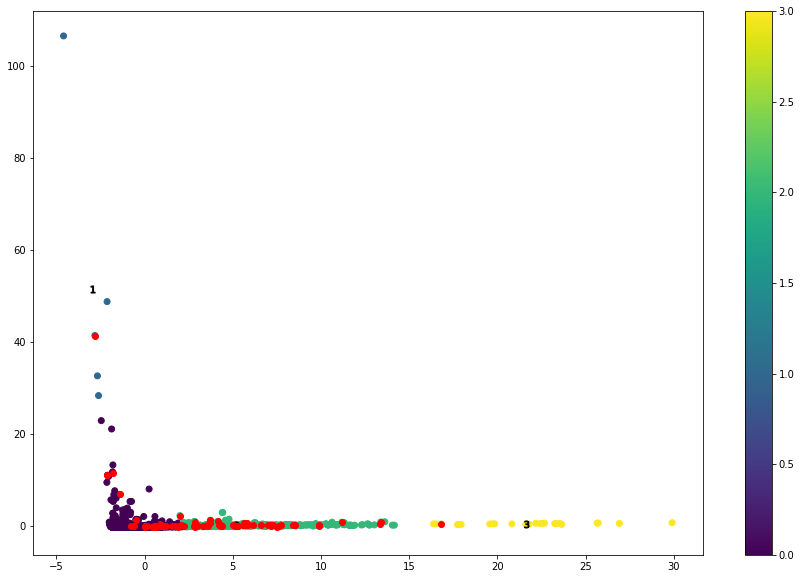

(5105, 437)

In [66]:
df = dataset#[dataset['thickness']==6]
plot_clust(kmeanpip, df[limitedset])
df.shape

In [31]:
df = dataset[dataset['outlier'] == 1]
kmeanpip.predict(df[limitedset])

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
labeltoshow = 1

coltodisplay = limitedset

labels = kmeanpip.predict(dataset[limitedset])
mask = np.where(labels==labeltoshow)
dataset.iloc[mask][coltodisplay].describe()

## Silhouette calculation

In [ ]:
range_n_clusters = [2, 3, 5, 8]

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = kmeanpip
    clusterer.set_params(kmeans__n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(dataset[limitedset])
    
    Xscaled = clusterer.named_steps['scaler'].transform(dataset[limitedset])
    Xpca = clusterer.named_steps['pca'].transform(Xscaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xpca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xpca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xpca[:, 0], Xpca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.named_steps['kmeans'].cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14)

    plt.show()